# <h1 align="center"> THEME 3 - Visualisation </h1>

### 🎯 Objectifs

- Visualisation de fonctions analytiques
- Utilisation de graphiques appropriés pour visualiser un jeu de données
- Utilisation de techniques d'analyse graphique
- Génération d'animations

### 📚 Notions 

- [Exemple 1](#ex1):
    - Anatomie d'un graphique matplotlib
    - Tracer une courbe de base
    - Personalisation de la courbe
    - Tracer plusieurs courbes sur un même graphique
- [Exemple 2](#ex2):
    - Tracer un diagramme à barres verticales/horizontales
    - Tracer un diagramme circulaire
    - Tracer un mix de graphiques dans une seule figure
- [Exemple 3](#ex4): Visualisation 2D
- [Exemple 4](#ex5): Visualisation 3D
- [Exemple 5](#ex5): Animation

Un [lexique](#lexique) avec l'ensemble des fonctions qui ont été vues est disponible à la fin du notebook.

### 🧰 Librairies

- **Matplotlib** est une librairie complète qui permet de créer très facilement des visualisations principalement statiques et interactives en Python.
- **PyQtGraph** est une librairie de haute performance, axée sur la visualisation d'une grande quantité de données, animations et création de GUI.

### 🔗 Références

- [Documentation Matplotlib](https://matplotlib.org/3.5.0/index.html)
- [Scientific visualization with Python & Matplotlib](https://github.com/rougier/scientific-visualization-book/blob/master/pdf/book.pdf)
- [Documentation PyQtGraph](https://pyqtgraph.readthedocs.io/en/latest/)

---

## <h2 align="center" id='ex1'> Exemple 1 - Équation de Van Der Waals </h2>

### 📝 Contexte
En thermodynamique, l'équation de Wan Der Waals permet de décrire l'état d'un fluide: 

$$
\begin{aligned}
P=\frac{RT}{{\bar{V}}-b}-\frac{a}{{\bar{V}}^2}
\end{aligned}
$$

Avec
$$
\begin{aligned}
a &=\frac{27}{64}\frac{{{T_{c}}^2}{R^2}}{P_{c}}\\
b &=\frac{{R}{T_{c}}}{{8}{P_{c}}}\\
\end{aligned}
$$

En prenant pour exemple l'hexane: 
- $R=8.314 \mathrm{{J} {mol^{−1}} {K^{−1}}}$ (constante des gazs parfaits)
- $T_{c}=507.5 \mathrm{K}$ (Température critique)
- $Pc = 30.1 \times {10^5} \mathrm{Pa}$ (Pression critique)

### ⭐ Objectif

Afficher sur un même graphique la pression $P$ pour un volume molaire $\bar{V}$ entre $10^{-4}$ et $1 m^{3}mol^{-1}$ pour des températures égales à 0.5, 0.75, 1, 1.5 et 2 fois la température critique $T_{c}$.

### 💻 Code

On commence par définir les constantes et la fonction du problème

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des constantes du problème
const = {
    "R": 8.314,  # J/(K*mol)
    "T_c": 507.5,  # K
    "P_c": 30.1 * 1e5,  # Pa
}

const["a"] = 27 / 64 * (const["T_c"] ** 2 * const["R"] ** 2) / const["P_c"]
const["b"] = (const["R"] * const["T_c"]) / (8 * const["P_c"])

# Création du vecteur qui contient les valeurs de température
vec_T = np.array([0.5, 0.75, 1, 1.5, 2]) * const["T_c"]


def fn_van_der_waals(const, T, vec_V):
    """
    Équation de Van der Waals sous forme intensive
    Args:
        - const: dictionnaire des constantes du problème
        - T: température en K
        - vec_V: vecteur des valeurs de V
    Returns:
        - vec_P: vecteur des valeurs de P
    """
    vec_P = const["R"] * T / (vec_V - const["b"]) - const["a"] / (vec_V**2)
    return vec_P

Pour ensuite visualiser des données, il est d'abord essentiel de comprendre la terminologie des différents éléments qui composent un graphique matplotlib.

<center>
    <img src='assets/anatomy_of_figure.png' width=500px>
</center>

Pour commencer, traçons une courbe simple en prenant les valeurs évaluées pour $T = 0.25*T_{c} \approx 127 K$.

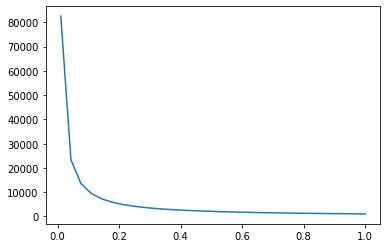

In [3]:
T = 127  # K
# Discrétisation du volume molaire entre 0.01 et 1 avec 31 points
vec_V = np.linspace(0.01, 1, 31)
# Calcul de la pression avec notre fonction
vec_P = fn_van_der_waals(const, T, vec_V)

plt.plot(vec_V, vec_P)  # Ajout de la courbe
plt.show()  # Afficher la figure

Matplotlib est une librairie très complète qui offre beaucoup d'options pour personnaliser les graphiques. En consultant la documentation officielle, on peut voir que la fonction `plt.plot` accepte plusieurs arguments optionnels pour modifier l'apparence de la courbe:

`plt.plot(<données x>,<données y>,'<couleur><marqueur><type de ligne>', linewidth=, markersize=, label=)`.

- `<couleur>` est la [couleur](https://matplotlib.org/2.0.1/api/colors_api.html) de la ligne (et des points).
- `<marqueur>` est le type de [point](https://matplotlib.org/stable/api/markers_api.html) utilisé.
- `<type de ligne>` est le [style de ligne](https://matplotlib.org/2.0.1/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle) utilisé (pleine, tiretée, pointillés, etc...)

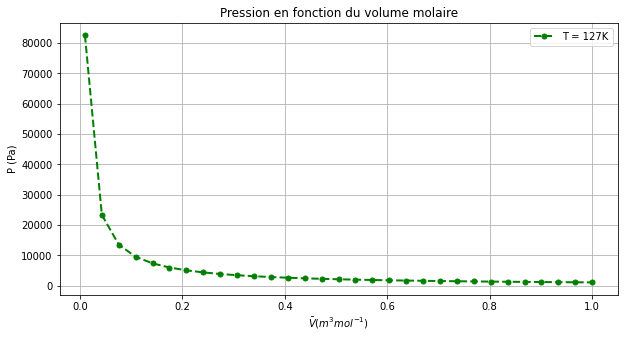

In [4]:
# Ajuster la taille du graphique affiché sur le notebook
f = plt.figure(figsize=(10, 5))

# Tracer la pression en fonction du volume molaire
# ----------------------------------------------------------------------------
# 'go--' veut dire green - circle marker - dashed line
# On peut aussi rentrer ces arguments avec color='green', marker='o', linestyle='dashed'
# linewidth et markersize controlent la largeur de la ligne et la taille du marqueur en pixels
# Label= permet de donner un nom à la courbe qui sera affiché dans la légende
plt.plot(vec_V, vec_P, "go--", linewidth=2, markersize=5, label=f"T = {T}K")

# Ajout des éléments d'un graphique
# ----------------------------------------------------------------------------
plt.title("Pression en fonction du volume molaire")  # Titre du graphique
plt.legend()  # Affiche la légende
plt.xlabel(r"$\bar{V} (m^{3} mol^{-1})$")  # Titre d'axe des x en Latex
plt.ylabel("P (Pa)")  # Titre d'axe des y
plt.grid(True)  # Affiche la grille

plt.show()

Matplotlib permet aussi de tracer plusieurs courbes sur un même graphique en appelant plusieurs fois la fonction `plt.plot()` avant d'afficher le graphique.

Pour notre problème, un graphique avec échelle logarithmique en x est plus adapté. Avec Matplotlib, on peut utliser `plt.semilogx()` de façon analogue à `plt.plot()`. Cependant le vecteur x doit maintenant être généré de façon logarithmique et pas linéaire comme avant. Avec numpy, cela se fait très facilement avec `np.logspace()`.

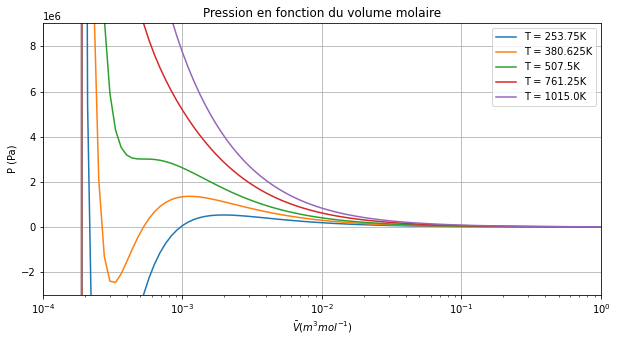

In [5]:
# Discrétisation logarithmique du volume molaire entre 10^-4 et 10^0
vec_V = np.logspace(-4, 0, 101, base=10)

f = plt.figure(figsize=(10, 5))

# Passer à travers les températures, calculer la pression pour chaque volume
# molaire et ajouter la courbe au graphique
for t in vec_T:
    P = fn_van_der_waals(const, t, vec_V)
    plt.semilogx(vec_V, P, label=f"T = {t}K")  # Ajout de la courbe

plt.title("Pression en fonction du volume molaire")
plt.legend()
plt.xlabel(r"$\bar{V} (m^{3} mol^{-1})$")
plt.ylabel("P (Pa)")
plt.xlim(1e-4, 1e0)  # Fixer les limites en x
plt.ylim(-const["P_c"], 3 * const["P_c"])  # Fixer les limites en y
plt.grid(True)

plt.show()

### 💡 Astuces

- Avec Matplotlib, il y a un grand nombre d'arguments pour personnaliser un graphique. Ne jamais hésiter à jeter un coup d'oeil à la documentation officielle pour se rafraichir la mémoire sur l'utilisation d'une fonction ou pour en savoir plus. 

## <h2 align="center" id='ex2'> Exemple 2 - Données Hydro-Québec </h2>

### 📝 Contexte

> L’ouverture des données est devenue, en quelques années, une pratique incontournable. Gouvernements, entreprises et collectivités intègrent les données ouvertes dans leur démarche d’innovation. Ce projet vise à permettre à des tiers de valoriser nos données afin de contribuer activement à la transition énergétique.

Tiré de [Hydro-Québec](https://www.hydroquebec.com/documents-donnees/donnees-ouvertes/)

Parmis ces données, Hydro-Québec rend disponible les données en temps réel de demande et production d'électricité au québec qui sont mises à jour toutes les 15min et 1h respectivement.

Cependant, pour simplifier l'exemple, un snapshot des données a été fait le 25 mai et enregistré localement sous format JSON. 

JSON est un format de données textuelles très employé dans la transmission de données web. Sa structure ressemble à un dictionnaire Python: il y des clés qui contiennent des objets qui peuvent être des valeurs, une liste ou encore un autre dictionnaire.

### ⭐ Objectif

Commencer par:
- Tracer un graphique à barres avec les données de CO2 équivalent par kWh pour plusieurs sources d'électricité. ([source](https://www.hydroquebec.com/a-propos/notre-energie.html))

Puis dans un seul graphique, tracer: 
- Une courbe avec la demande et la production totale d'électricité. ([demande](https://raw.githubusercontent.com/gch-faps/faps-python/main/theme3/assets/demande.json))
- Une courbe avec l'évolution des sources d'électricité dans la journée ([production](https://raw.githubusercontent.com/gch-faps/faps-python/main/theme3/assets/demande.json))
- Un graphique circulaire des sources de l'électricité du Québec dans la dernière heure. 

### 💻 Code

Pour commencer, à partir des données du site web, il faut définir manuellement les données de CO2 équivalent dans un dictionnaire.

In [6]:
co2_eq = {
    "Hydro": 28,
    "Éolien": 14,
    "Nuléaire": 8,
    "Solaire": 64,
    "Gaz naturel": 608,
    "Charbon": 880,
}

Pour tracer un graphique à barres verticales on peut utiliser `plt.bar()`:

`plt.bar(<données x>, <données y>, width=, align=)`

- `données x` sont les données en x qui dans notre cas sont les sources.
- `données y` sont les données en y qui dans notre cas sont les valeurs de CO2 eq. 
- `width=` pour ajuster la largeur des barres.
- `align=` pour spécifier le mode d'alignement des données en x

Pour un graphique à barre horizontales, remplacer par `plt.barh()`.

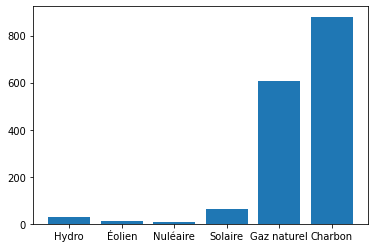

In [7]:
# Isoler les clés du dictionnaire dans une liste
sources = list(co2_eq.keys())
# Isoler les valeurs du dictionnaire dans une liste
valeurs = list(co2_eq.values())

# Afficher le graphique à barres
plt.bar(sources, valeurs, align="center")
# plt.barh(sources, valeurs, align='center') # Pour barres horizontales
plt.show()

Pour les données de [demande](https://raw.githubusercontent.com/gch-faps/faps-python/main/theme3/assets/demande.json) et [production](https://raw.githubusercontent.com/gch-faps/faps-python/main/theme3/assets/demande.json), on doit d'abord obtenir les données qui sont enregistrées sous format JSON à leur url respectifs. En consultant l'url des données de production par exemple, on voit que le JSON est comme un dictionnaire Python avec des clés associées à une liste de données. 

Pour cela on va avoir besoin de 2 librairies supplémentaires: `urllib` pour effectuer des requetes web et `json` pour lire les données json en dictionnaire Python.

In [8]:
from urllib.request import urlopen
import json

# URLs où se trouvent les données
demande_url = "https://raw.githubusercontent.com/gch-faps/faps-python/main/theme3/assets/demande.json"
production_url = "https://raw.githubusercontent.com/gch-faps/faps-python/main/theme3/assets/production.json"


def get_json_data(url):
    """
    Fonction qui à partir de l'url des données JSON d'Hydro Québec, extrait les données, transforme les dates en
    objet datetime et les renvoie sous forme de dictionnaire
    Args:
        - url: URL où se trouve le fichier JSON
    Returns:
        - Données sous forme de dictionnaire
    """
    # Récupérer et lire le fichier JSON à partir de l'url
    with urlopen(url) as u:
        raw_data = json.loads(u.read().decode())

    # Transforme les dates en objet datetime (utile pour les graphiques)
    raw_data["date"] = np.array(raw_data["date"], dtype="datetime64[s]")

    return raw_data


# Obtention des données avec notre fonction
demande = get_json_data(demande_url)
production = get_json_data(production_url)

# Affichages des clés des dictionnaires
print("Demande", demande.keys())
print("Production", production.keys())

Demande dict_keys(['date', 'demandeTotal'])
Production dict_keys(['date', 'total', 'hydraulique', 'eolien', 'autres', 'solaire', 'thermique'])


Matplotlib permet plusieurs façons de tracer plusieurs graphiques dans une seule figure. L'une de ces méthodes est `plt.subplot_mosaic()`, elle permet de définir la position de chaque graphique en utilisant une notation matricielle. Par exemple, si l'on veut 2 graphiques l'un au dessus de l'autre à gauche et un seul à droite on peut faire: `plt.subplot_mosaic([['A', 'C'],['B', 'C']])` avec 'A', 'B et 'C' les noms des graphiques.

Pour tracer un diagramme circulaire avec Matplotlib, on emploie `plt.pie`. 

{'hydraulique': 16125.0, 'eolien': 1119.0, 'autres': 608.0}


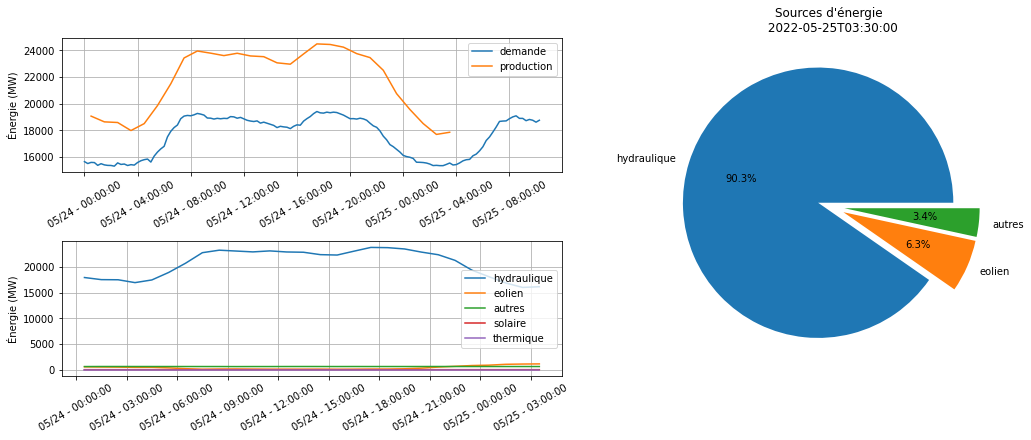

In [9]:
import matplotlib.dates as mdates

# Initialiser la figure avec 3 graphiques
# 'A' va être les courbes de demande et production
# 'B' va être les courbes d'évolution des sources d'énergie'
# 'C' va être le diagramme circulaire des dernières données des sources d'énergie
# -------------------------------------------------------------------------------------------------
fig, axs = plt.subplot_mosaic([["A", "C"], ["B", "C"]], constrained_layout=True, figsize=(15, 6))

# Graphique A
# -------------------------------------------------------------------------------------------------
axs["A"].plot(demande["date"], demande["demandeTotal"], label="demande")  # Courbe de demande
axs["A"].plot(production["date"], production["total"], label="production")  # Courbe de production
axs["A"].legend()
axs["A"].xaxis.set_major_formatter(mdates.DateFormatter("%m/%d - %H:%M:%S"))  # Formatage des dates
axs["A"].xaxis.set_tick_params(rotation=30)  # Rotation des dates
axs["A"].set_ylabel("Énergie (MW)")
axs["A"].grid(True)

# Graphique B
# -------------------------------------------------------------------------------------------------
sources = ["hydraulique", "eolien", "autres", "solaire", "thermique"]  # Sources d'énergie
# Ajouter une courbe pour chaque source d'énergie
for source in sources:
    axs["B"].plot(production["date"], production[source], label=source)
axs["B"].legend(loc="center right")  # Afficher la légende avec une position (loc) fixée au milieu à droite
axs["B"].xaxis.set_major_formatter(mdates.DateFormatter("%m/%d - %H:%M:%S"))
axs["B"].xaxis.set_tick_params(rotation=30)
axs["B"].set_ylabel("Énergie (MW)")
axs["B"].grid(True)

# Graphique C
# -------------------------------------------------------------------------------------------------
# Obtenir les dernières valeurs de production pour chaque source d'énergie avec plus de 100 MW de puissance.
last_src = {src: production[src][-1] for src in sources if production[src][-1] > 100}
print(last_src)  # Affichage du dictionnaire pour mieux comprendre le contenu

# Ajouter le diagramme circulaire
explode = [0.1] * len(last_src)  # Liste de décalage pour une explosion de chaque morceau du diagramme
axs["C"].pie(list(last_src.values()), labels=list(last_src.keys()), explode=explode, autopct="%1.1f%%")
axs["C"].set_title(f"Sources d'énergie \n {production['date'][-1]}")  # Titre du graphique

# Affichage de la figure
# -------------------------------------------------------------------------------------------------
plt.show()

### 💡 Astuces

- L'utilisation des `subplots` en général peut être assez compliqué. Généralement on peut utiliser les fonctions de `plt` avec `axs`, cependant elles sont très souvent nommées différemment comme `axs.set_title()` plutot que juste `plt.title()`. Cela est dû au fait que les subplot utilisent le `matplotlib.axes` API plutot que `matplotlib.pyplot`. Une liste des fonctions qui peuvent être appliquées à un `axs` se trouve [ici](https://matplotlib.org/stable/api/axes_api.html).

## <h2 align="center" id='ex3'> Exemple 3 - Équation de diffusion 2D </h2>


In [57]:
import requests
import io

nx = 100
ny = 100

response = requests.get('https://my_url/diffusion.npy')
u = np.load(io.BytesIO(response.content))  # Works

x_mean = u.mean(axis=0)
y_mean = u.mean(axis=1)
y_mean_px = np.arange(ny)
x_mean_px = np.arange(nx)

ConnectionError: HTTPSConnectionPool(host='my_url', port=443): Max retries exceeded with url: /diffusion.npy (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000264DDE84280>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

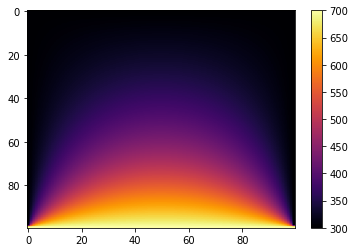

In [53]:
im = plt.imshow(u, cmap=plt.get_cmap('inferno'), aspect='auto')
plt.colorbar(im)
plt.show()

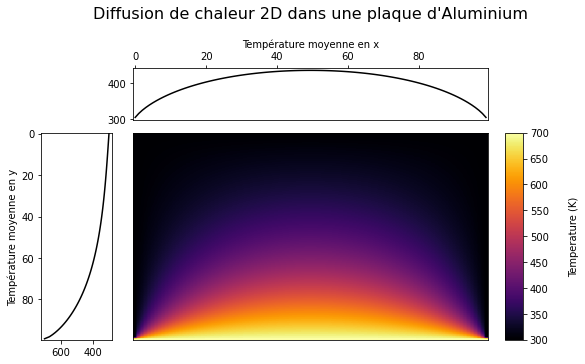

In [54]:
fig, axs = plt.subplot_mosaic([['null', 'xmean'],['ymean', 'heat']], figsize=(8,5), gridspec_kw= {'width_ratios': [1, 5], 'height_ratios': [1, 4], 'wspace':0.1, 'hspace':0.1})

im = axs['heat'].imshow(u, cmap=plt.get_cmap('inferno'), aspect='auto')
axs['heat'].xaxis.set_visible(False)
axs['heat'].yaxis.set_visible(False)

axs['ymean'].plot(y_mean, y_mean_px, 'k-')
axs['ymean'].invert_xaxis()
axs['ymean'].sharey(axs['heat'])
axs['ymean'].set_ylabel('Température moyenne en y')

axs['xmean'].plot(x_mean_px, x_mean, 'k-')
axs['xmean'].xaxis.set_ticks_position('top')
axs['xmean'].xaxis.set_label_position('top')
axs['xmean'].sharex(axs['heat'])
axs['xmean'].set_xlabel('Température moyenne en x')
axs['xmean'].set_title('Diffusion de chaleur 2D dans une plaque d\'Aluminium', fontsize=16, pad=20)
w=0.05
pad = 0.03
w=w*(axs['heat'].get_position().x1-axs['heat'].get_position().x0)
h=(axs['heat'].get_position().y1-axs['heat'].get_position().y0)
x1=axs['heat'].get_position().x1 + pad
y1=axs['heat'].get_position().y0

cax = fig.add_axes([x1,y1,w,h])
cmap = fig.colorbar(im, cax=cax)
cmap.set_label('Temperature (K)', labelpad=20)

axs['null'].set_axis_off()
plt.show()

## <h2 align="center" id='lexique'> Lexique </h2>

### 📚 Terminologie

### ✔️ Vu dans l'exemple 1

